## Ablation study on Rmiss

We perform an ablation study that details the effect of using differen models to compute the label certainty $r$ and create the plots using this notebook.

In [1]:
import os
os.chdir("..")

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
noise_lvls = [0.0, 0.02, 0.05, 0.1, 0.2, 0.5]

In [28]:
import json
import numpy as np
ft_model = "tasksource"

pmiss_models =[("v1_tasksource", 1), ("v2_tasksource", 2), ("v3_tasksource", 3), ("v4_tasksource", 4), ("v5_tasksource", 5),
               ("v1_vectara_v2", 1), ("v2_vectara_v2", 2), ("v3_vectara_v2", 3), ("v4_vectara_v2", 4), ("v5_vectara_v2", 5),
               ("v1_alignscore", 1), ("v2_alignscore", 2), ("v3_alignscore", 3), ("v4_alignscore", 4), ("v5_alignscore", 5)
              ]

all_data_matrix =[]
for pmissmodel, seed in pmiss_models:
    x_ft_final = []
    for noise in noise_lvls:
        try:
            if noise > 0.0:
                res = json.load(open(f"rmiss-ragtruth-Summary/rmiss_eval3_{pmissmodel},noise={noise}_ragtruth_Summary_rerun/eval_out_final.json"))
                x_ft_final.append(res[ft_model]["roc"])
            elif noise == 0.0 and "tasksource" not in pmissmodel:
                res = json.load(open(f"rmiss-ragtruth-Summary/rmiss_eval3_{pmissmodel}_ragtruth_Summary_rerun/eval_out_final.json"))
                x_ft_final.append(res[ft_model]["roc"])
            else:
                res = json.load(open(f"eval_run-ragtruth-Summary/seed_{seed}-{ft_model}/eval_out_unweighted_test_list.json"))
                #print(res)
                x_ft_final.append(res["2"][ft_model]["roc"])
        except Exception:
            x_ft_final.append(float("nan"))
    all_data_matrix.append(x_ft_final)
all_data_matrix = np.array(all_data_matrix)

In [29]:
all_data_matrix[0:15]

array([[0.83752551, 0.82792684, 0.83720051, 0.83105585, 0.84140277,
        0.82183508],
       [0.83589298, 0.82907566, 0.8379412 , 0.83335349, 0.83717784,
        0.8254856 ],
       [0.84406318, 0.82824427, 0.82454841, 0.83020936, 0.83585519,
        0.83465347],
       [0.84257426, 0.80584234, 0.81537299, 0.8168468 , 0.80327262,
        0.81579624],
       [0.82385307, 0.80695337, 0.83045877, 0.83200816, 0.8248734 ,
        0.8342151 ],
       [0.83268838, 0.82943844, 0.82695186, 0.83161515, 0.83858363,
        0.83853072],
       [0.83606681, 0.83647495, 0.82680825, 0.82158567, 0.83928652,
        0.81616658],
       [0.82246996, 0.81631018, 0.83165294, 0.81482881, 0.8057063 ,
        0.8303454 ],
       [0.83079132, 0.82464666, 0.82714836, 0.82390598, 0.82777568,
        0.83194014],
       [0.82342982, 0.8190613 , 0.83744237, 0.83738946, 0.82207694,
        0.8176026 ],
       [0.81465498, 0.81946943, 0.83197793, 0.83274885, 0.82715592,
        0.82864485],
       [0.8084952 , 0

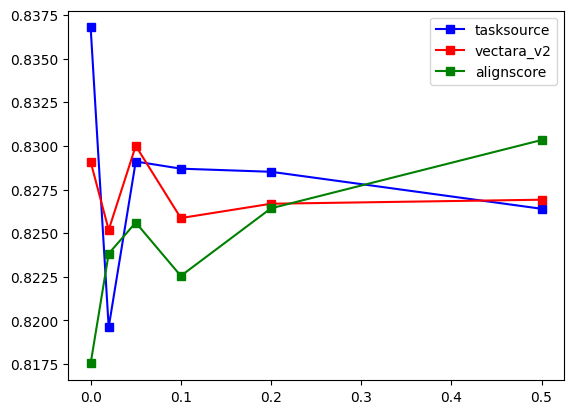

In [30]:
import matplotlib.pyplot as plt
plt.plot(noise_lvls, np.nanmean(all_data_matrix[:5,:], axis=0), "-s", c="b", label="tasksource")
plt.plot(noise_lvls, np.nanmean(all_data_matrix[5:10,:], axis=0), "-s", c="r", label="vectara_v2")
plt.plot(noise_lvls, np.nanmean(all_data_matrix[10:15,:], axis=0), "-s", c="g", label="alignscore")
plt.legend()

In [54]:
## baselines:
xt_baselines = {}
for baseline in ["v2_none"]:
    res = json.load(open(f"runs/rmiss_eval3_{baseline}_ragtruth_QA/eval_out_unweighted_test_list.json"))
    xt_baselines[baseline] =res["2"][ft_model]["roc"]

In [55]:
xt_baselines

{'v2_none': 0.8350840336134454}

In [56]:
xt_baselines["constant_pmiss"] = xt_baselines["v2_none"]
del xt_baselines["v2_none"]

In [37]:
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['text.usetex']= True
rcParams['pgf.texsystem'] ="pdflatex"
rcParams["text.latex.preamble"] = r"\usepackage{times}"
rcParams["font.family"] = 'times'

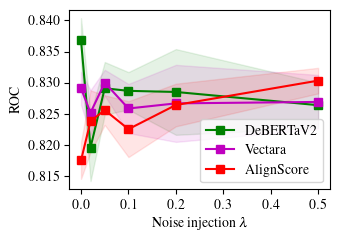

In [41]:
import matplotlib.pyplot as plt
#plt.plot(noise_lvls, np.nanmean(all_data_matrix[:6,:], axis=0), "-o", c="0.5", label="average")
colors = ["g", "m", "r"]
labels = ["DeBERTaV2", "Vectara", "AlignScore"]
num_runs = 5
for i, (setup_use, color_use) in enumerate(zip(labels, colors)):
    mean_rnd = np.mean(all_data_matrix[i*num_runs:(i+1)*num_runs], axis=0)
    mean_rnd_std = np.std(all_data_matrix[i*num_runs:(i+1)*num_runs], axis=0)/2.0 # Standard error
    plt.fill_between(noise_lvls, mean_rnd-mean_rnd_std, mean_rnd+mean_rnd_std, color=color_use, alpha = 0.1)
    plt.plot(noise_lvls, mean_rnd, label = f"{setup_use}", color=color_use,marker="s")

#plt.plot([0, 0.5], [xt_baselines["constant_pmiss"], xt_baselines["constant_pmiss"]], "--k", label="constant pmiss")
#ensemble = 0.5*(xt_baselines["v2_ensemble-mean"]+xt_baselines["v3_ensemble-mean"])
#plt.plot([0, 0.5], [ensemble, ensemble], "--", c="tab:orange", label="ensembling")
plt.legend(loc="lower right")
plt.ylabel("ROC")
plt.xlabel(r"Noise injection $\lambda$")
plt.gcf().set_size_inches(3.5,2.5)
plt.tight_layout()
plt.gcf().savefig("figures/rmiss2.pdf")

In [69]:
from src.cross_encoder_model.model_wrappers import TwoWayDebertaV2

In [70]:
model = TwoWayDebertaV2.from_pretrained("tasksource/deberta-base-long-nli")